# Maximum Likelihood Estimation

Suppose we are given a model of the form:

$Y=\theta X +\epsilon$

and wish to estiate the parameters in the $\theta$ vector.

This can be translated into a probability model where:

$f(\theta|Y, X) = {\displaystyle \prod_{n=1}^{n} f(\theta_{i}, Y_{i}, X_{i})}$ the joint probability mass, for some probability mapping.

This is cast as a likelihood function which can roughly be interpreted as:

"Given some value of $\theta$, how likely is this theta given our observed data?"

The Likelihood function $L(\theta)$, is the function that describe the likelihood of observing these parameters and is formally:

$L(\theta) = {\displaystyle \prod_{n=1}^{n} f(\theta_{i}, X_{i})}$ , which is simply the joint likelihood of data and parameter values for some probability function

## Estimation

Since log the log transformation of any function retains the same $x$ values, and logs are easier to work with, we transform the likelihood function into a log-likelihood function. This now becomes an optimization problem, where we are optimizing for $\theta$

$\nabla (L(\theta))= \nabla {\displaystyle \prod_{n=1}^{n} f(\theta_{i}, X_{i})}$

The likelihood is a function of our $\theta$ value, and the observed data. We maxmimize the function with respect to the $\theta$ vector



# Newtons Method for Finding the Roots of the likelihood

Briefly, newtons method is an iterative method used to find the roots of a function. We can use this in maximum likelihood estimation because, finding the point where $x=0$ is the same as finding the maximum of a function if we are using newtons method on the derivative of a function. So if we find the zeros of $\nabla (L(\theta))= \nabla {\displaystyle \prod_{n=1}^{n} f(\theta_{i}, X_{i})}$, the derivative of the log-likelihood function, this means we are finding the points $x$ where the function of $x$ is maximized. We can choose this method for convex functions in low dimension because it is guarenteed to converge to the correct value (and if there is not a closed form solution for the score function)

In the case of maximum likelihood, we want to find the roots of the derivative function. This is because when $f'(x) = 0$, the objective function is maximized at that point $x$.

## The Algorithm:

$i = 0$

$while {\lvert}f'(x_{i}) - f'(x_{i-1}){\rvert}> tolerance$

$i+=1$

$x_{i+1} = x_{i} - ( \frac{f'(x_{i})}{f''(x_{i})})$

return $x = x_{i}$

Discussion: while the function of the derivtive is greater than some small value, typically close to zero but can never be zero, update the $ith$  $x$ as the prior $x$ subtracted by the ratio of the first and second derivatives evaluated at that point. 

You typically have some other constraint in the While clause such as a count of the iterations so it doesnt loop forever. 

In the multivariate case, the second derivative is the Hessian, which is the matrix of second order partials.

Initialize and re-compute every error each iteration

deriving the sigmoid: https://eecs.ceas.uc.edu/~aminai/papers/minai_sigmoids_NN93.pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
import warnings

In [2]:
#sigmoid function
#sigmoid function
def sigmoid_univariate(x,w):
    '''
    x is a numpy array of data
    '''
    return 1/(1+np.exp(-x*w))

def sigmoid(x,w):
    '''
    x is a n*d numpy array of data
    '''
    if x.shape[1] >1:
        x = x.T
    return 1/(1+np.exp(-(np.dot(x,w))))

def deriv_sig(x,w):
    '''
    first derivative of sigmoid
    
    np.exp(-(np.dot(x.T,w)))/(1+np.exp(-(np.dot(x.T,w))))**2
    '''
    return sigmoid(x,w)*(1-sigmoid(x,w))
    
def secon_deriv_sig(x,w):
    '''
    second derivative of sigmoid
    sigmoid(x,w)*sigmoid(-x,w)*(sigmoid(-x,w) - sigmoid(x,w))
    '''
    if x.shape[1]>1:
        x = x.T
    top = np.exp(np.dot(x,w))*(np.exp(np.dot(x,w))-1)
    bottom = (np.exp(np.dot(x,w))+1)**3
    
    return -top/bottom

def ratio_sig(x,w):
    return deriv_sig(x,w)/secon_deriv_sig(x,w)

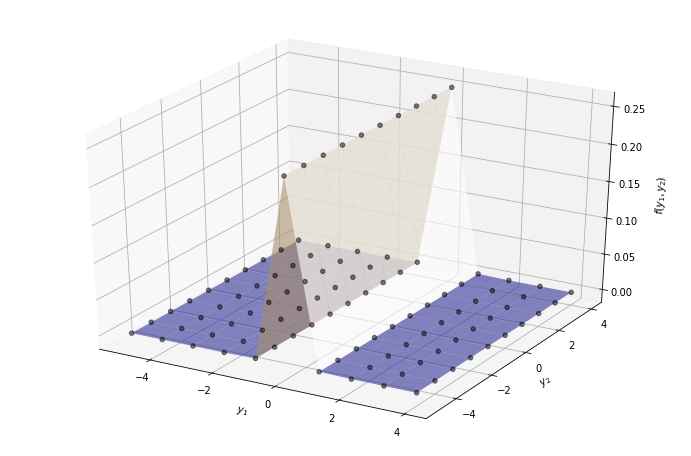

In [4]:
from mpl_toolkits.mplot3d import Axes3D

def plot_sigmoid(μ=15, y_n=5):
    yi_values = np.arange(-y_n, y_n, 1)

    # Create coordinate points of X and Y
    X,Y = np.meshgrid(yi_values,yi_values)

    # Multiply distributions together
    Z = deriv_sig(X, μ)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z.T, cmap='terrain', alpha=0.6)
    ax.scatter(X, Y, Z.T, color='black', alpha=0.5, linewidths=1)
    ax.set(xlabel='$y_1$', ylabel='$y_2$')
    ax.set_zlabel('$f(y_1, y_2)$', labelpad=10)
    plt.show()
plot_sigmoid(μ=7, y_n=5)

In [3]:
x = np.linspace(-10,10,100).reshape(100,1)
w = np.array([np.random.randint(5) for i in range(100)]).reshape(100,1)

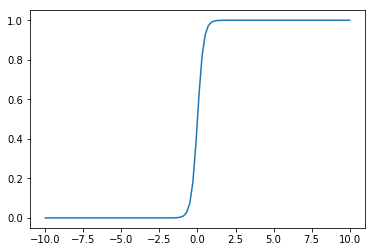

In [4]:
plt.plot(x,sigmoid_univariate(x,5))
plt.show()

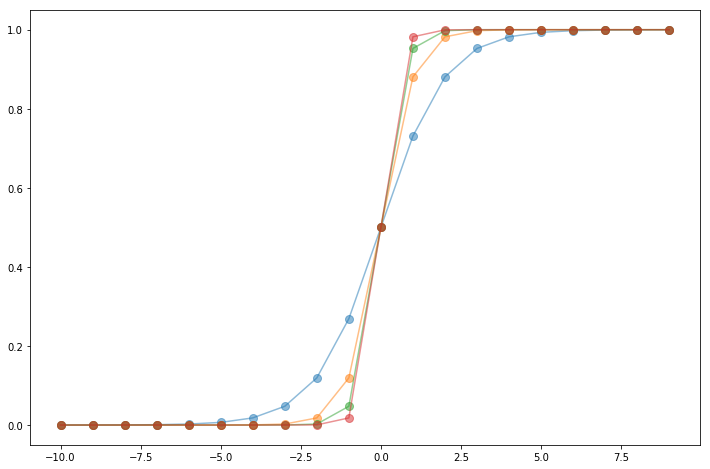

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
weight = [1,2,3,4]
for mu in weight:
    dist = []
    for yval in range(-10,10):
        dist.append(sigmoid_univariate(yval,mu))
    ax.plot(range(-10,10),
        dist,
        alpha=0.5,
        marker='o',
        markersize=8)
plt.show()

# Maximum Likelihood for Poisson Regression
Code adopted from:

https://lectures.quantecon.org/py/mle.html

In [94]:
def factorial(y):
    if y == 0:
        return 1
    prod = 1
    for j in range(1,y+1):
        prod *= j
    return prod

def vector_factorial(y):
    result = []
    if len(y) == 1:
        return factorial(y[0])
    
    if len(y) > 1:
        for i in y:
            result.append(factorial(i))

    return result

def general_factorial(y):
    if isinstance(y,list):
        return vector_factorial(y)
    if isinstance(y,(np.ndarray, np.generic)):
        resultset = []
        for row in y:
            #loop through each row of the data
            resultset.append(vector_factorial(row))
        return np.array(resultset)

In [109]:
poisson_pmf = lambda y, μ: μ**y / general_factorial(y) * np.exp(-μ)

Where $\mu = exp(X\beta)$

$\mu$ is the weight vector

$\beta$ are the individual parameters we wish to estimate

In [110]:
betas = np.random.random(10).T
obs = [np.random.random(10) for i in range(5)]

This is used to visualize what a join distribution looks like, because with maximum likelihood you are combining N distributions

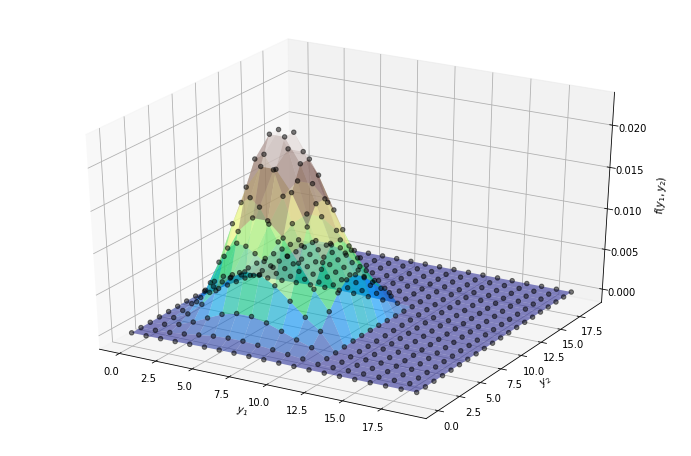

In [111]:
from mpl_toolkits.mplot3d import Axes3D

def plot_joint_poisson(μ=7, y_n=20):
    yi_values = np.arange(0, y_n, 1)

    # Create coordinate points of X and Y
    X, Y = np.meshgrid(yi_values, yi_values)

    # Multiply distributions together
    Z = poisson_pmf(X, μ) * poisson_pmf(Y, μ)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z.T, cmap='terrain', alpha=0.6)
    ax.scatter(X, Y, Z.T, color='black', alpha=0.5, linewidths=1)
    ax.set(xlabel='$y_1$', ylabel='$y_2$')
    ax.set_zlabel('$f(y_1, y_2)$', labelpad=10)
    plt.show()

plot_joint_poisson(μ=7, y_n=20)

Above we mentioned that the likelihood is the product of individual joint densities for our N samples. This is equivalent to transforming the likelihood, into the log likeihood. Turning the sumprod into a summation of log density functions. 

The log likelihood of the poisson is:

$Log(L(\beta)) = \sum_{i}^{n} y_{i}*log(\mu_{i}) - \sum_{i}^{n} \mu_{i} - \sum_{i}^{n} log(y!)$

Side:

Remember, the likelihood $L(\theta)$ is the product of individual densities for that observation $i$ for some density function. 

So in this case, poison takes two args $(\mu , y)$ and produces some probability P. We are assuming the observations are i.i.d so we can multiply them all together by this nice rule: https://www.wyzant.com/resources/lessons/math/statistics_and_probability/probability/further_concepts_in_probability

In theory, nothing is stopping us from multiplying all of the probabilities together. The code would look something like this:

y = [obs1,obs2..., obsn]

mu = [mu1,mu2.....mu_n]

prod = 0

for i,j in zip(y,mu):

    prod*=poison(i,j)
    
return prod

Side note: Can be generalized to multivariate functions

And now comes Newton Raphson

In [126]:
from scipy.special import factorial

def mu(x,w):
    return(np.exp(x@w.T))

def loglike(x,y,w):
    return(np.sum(y*np.log(mu(x,w)) - mu(x,w) - np.log(factorial(y))))

def grad(x,y,w):
    return((y - mu(x,w))@x).reshape(x.shape[1],1)

def hess(x,w):
    return-(mu(x,w)*x.T@x)

In [127]:
x = np.array([[1, 2, 5],
              [1, 1, 3],
              [1, 4, 2],
              [1, 5, 2],
              [1, 3, 1]])

y = np.array([1, 0, 1, 1, 0])

# Take a guess at initial w
w = np.array([0.1, 0.1, 0.1])

In [136]:
def newton(x,y,w,tolerance):
    i = 0
    err = 50
    while np.any(err>tolerance):
        
        w_new = w - (np.linalg.inv(hess(x,w))@grad(x,y,w)).T
        err = w_new - w 
        w = w_new.flatten()
        
        print(i,loglike(x,y,w),w)
        
        i+=1
        
    return w

newton(x,y,w,.01) 

0 -4.34476224171692 [-1.48899977  0.26480369  0.24381722]
1 -3.57424129935225 [-3.3839381   0.52781212  0.47408367]
2 -3.3999525603337077 [-5.0644346   0.78159328  0.70175342]
3 -3.378864647426228 [-5.91511889  0.90916891  0.82034123]
4 -3.3783559008160853 [-6.07389901  0.93272496  0.84265078]
5 -3.3783555052241394 [-6.07848205  0.93340226  0.84329625]


array([-6.07848205,  0.93340226,  0.84329625])